# Sentence Alignment

#### Charlie Liou

In [15]:
import re, string
import os, glob
import numpy as np
import pandas as pd, matplotlib.pyplot as plt
from itertools import chain
%matplotlib inline

TED data directory:

In [2]:
#my personal computer
#path = "C:\\Users\\chuck189\\Desktop\\Cal Poly Summer Research 2017\\data\\TED"

#math lounge computer
path = "/Users/csmuser/Desktop/Cal Poly Summer Research 2017/data/TED"

os.chdir(path)
files = glob.glob("*.txt")

## What algorithm to use?

In [3]:
def eng_length(s):
    exclude = set(string.punctuation)
    return "".join(c for c in s if c not in exclude).split(" ")

In [4]:
def zhtw_length(s):
    num = 0
    zhtwpunct = set(string.punctuation + "〈〉「」。，—")
    for i in [[m.start(), m.end()] for m in re.finditer("([A-z])\w+", s)]:
        s = s[:i[0] - num] + "我" + s[i[1] - num + 1:] 
        num += i[1] - i[0]
    return([x for x in list(chain.from_iterable("".join(ch for ch in s if ch not in zhtwpunct))) if x.strip() != ""])

In [5]:
def paragraph_length(files):
    a = ["eng\tzhtw\tdiff"]
    for x in files:
        l = list(chain.from_iterable([i.split("\t") for i in open(x, "r", encoding = "utf-8").read().split("\n")]))
        eng = len(eng_length(l[4]))
        zhtw = len(zhtw_length(l[5]))
        a.append(str(eng) + "\t" + str(zhtw) + "\t" + str((zhtw - eng) ** 2))
    f = open("talk_length.txt", "w")
    f.write("\n".join(a))
    f.close()

paragraph_length(files)

In [21]:
talklength = np.array([i.split("\t") for i in open("talk_length.txt", "r", encoding = "utf-8").read().split("\n")])
df = pd.DataFrame(talklength[1:], columns = talklength[0]).astype(int)

This next graph shows that the number of English words and the number of Chinese characters per TED talk show a high positive correlation.

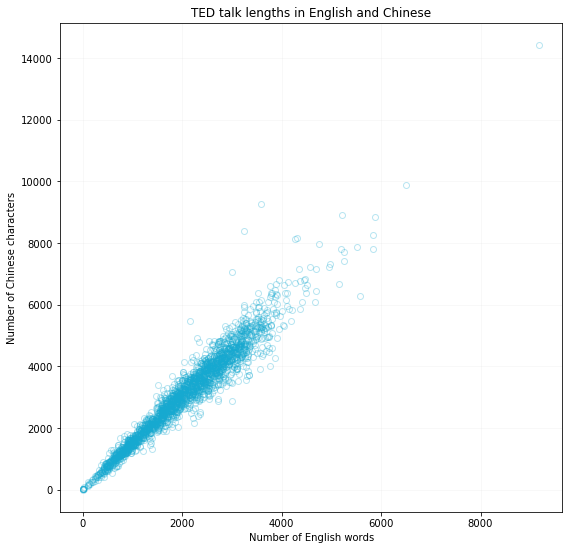

In [106]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)


ax.plot(df["eng"], df["zhtw"], marker = "o", ls = "None", mfc = "None", alpha = 0.3, c = "#16a9d0")
ax.set_title("TED talk lengths in English and Chinese")
ax.set_xlabel("Number of English words")
ax.set_ylabel("Number of Chinese characters")
ax.grid(alpha = 0.1);

In fact, the Pearson correlation is around 0.9689. A sentence alignment program that takes advantage of longer 

In [92]:
def r_squared(x, y):
    return ((x * y).mean() - x.mean() * y.mean()) / (np.sqrt(x.var()) * np.sqrt(y.var()))

r_squared(df["eng"], df["zhtw"])

0.96892143095422212

## Gale-Church

Let $L_1$ represent the language with less characters per TED talk. In this case, $L_1$ is English so $L_2$ is Chinese. Define a discrete random variable $X$ where each English word in $L_1$ maps to a random number of Chinese characters in $L_2$. Assume $X$ is i.i.d, $X \sim \mathcal{N}(c, s^2)$. By definition, $c$ is the expected number of Chinese characters in $L_2$ per English word in $L_1$, $s^2$ is the variance of Chinese characters in $L_2$ per English word in $L_1$. Define 

$$\delta = \dfrac{l_2 - c l_1}{\sqrt{l_1s^2}}$$

where $l_1$ is the length of the English text under consideration, $l_2$ defined similarly for Chinese. Note that $\delta \sim \mathcal{N}(0, 1)$.

$c$ is estimated by dividing the number of Chinese characters in the TED talks by the number of English words in the TED talks:

In [45]:
c = sum(talklength[:, 1]) / sum(talklength[:, 0])
c

1.5131001049045105